### Part A

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as mp
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from statistics import median
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

#### Importing the training data 

In [3]:
p2_train_df = pd.read_csv('/Users/gayathri/Downloads/CE802_P2_Data/CE802_P2_Data.csv')
train_data = p2_train_df.copy()
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-1.23,3.5390,-9.3000,1790.680,-5.6516,3501.98,2.9934,-0.5706,0,-1814.35,...,160.8874,6.4308,-44596.830,-8.4228,-129.147,2947.14,12.1050,-2.47360,NaN,False
1,-1.23,3.6255,-8.5150,2078.580,-12.1280,2880.88,5.3400,-1.1787,1,-3528.65,...,162.0042,8.9960,-44648.430,-9.1352,942.750,1812.46,9.7653,-1.88392,-13.05,False
2,-4.23,3.7488,-5.1830,1661.386,-6.6568,3224.18,3.1860,-4.1640,0,-2019.95,...,161.6324,6.2560,-44388.540,-10.6760,-445.770,1568.94,9.6048,-3.57060,NaN,False
3,-4.23,4.5770,-13.5076,1721.000,-6.1650,3818.78,4.3329,-6.3180,1,-2637.55,...,167.0780,6.4616,-44291.700,-9.0568,707.550,2693.14,11.6637,-2.44000,NaN,True
4,-1.23,3.6344,-9.2120,1807.380,-6.0992,2797.64,2.6697,-1.2141,0,-1953.15,...,167.5520,13.9400,-44189.862,-8.0792,-1712.850,2056.94,10.4574,-2.42340,-14.82,False


#### Data Type of each feature

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   int64  
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   int64  
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

#### Describing the columns

In [5]:
train_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,-2.817000,4.397873,-14.441708,1751.346393,-7.160027,2925.821510,4.633792,-3.272875,0.481000,-2516.494585,...,0.507000,180.844599,7.957217,-44308.352133,-9.528717,772.338153,2197.892611,12.105798,-2.708527,-14.913520
std,1.498224,0.902763,4.861641,246.538717,1.706913,702.890861,1.842535,2.708330,0.499889,511.582397,...,0.500201,20.571395,1.802407,5064.689411,1.739357,2242.412525,1058.036210,2.699756,1.343875,1.062748
min,-4.230000,3.442200,-30.150000,110.480000,-14.266000,-804.220000,2.311776,-13.764000,0.000000,-6440.650000,...,0.000000,160.544660,6.085980,-202470.030000,-16.710000,-11354.250000,-4096.460000,9.184140,-13.376000,-18.350000
25%,-4.230000,3.726475,-17.509750,1664.438750,-7.890000,2644.702500,3.173100,-4.510500,0.000000,-2650.550000,...,0.000000,166.924000,6.603650,-44220.360000,-10.299000,-173.709750,1787.840000,10.000725,-3.019050,-15.655000
50%,-4.230000,4.113700,-14.480050,1697.510000,-6.617500,2787.470000,4.232250,-2.436750,0.000000,-2505.538500,...,1.000000,174.704000,7.394500,-44162.373000,-9.018100,206.400000,1959.230000,11.234400,-2.207200,-14.865000
75%,-1.230000,4.794250,-11.366750,1764.817500,-5.898000,3019.155000,5.773500,-1.192350,1.000000,-2380.950000,...,1.000000,186.445000,8.694000,-44105.925000,-8.226650,1014.900000,2269.540000,13.554750,-1.827370,-14.180000
max,-1.230000,7.932000,4.730000,3341.480000,-5.362580,7740.780000,12.933000,-0.306360,1.000000,963.350000,...,1.000000,324.100000,15.190000,-33009.030000,-7.684440,15714.750000,13327.540000,22.386000,-1.740002,-11.540000


#### Heatmap for finding correlation

<AxesSubplot:>

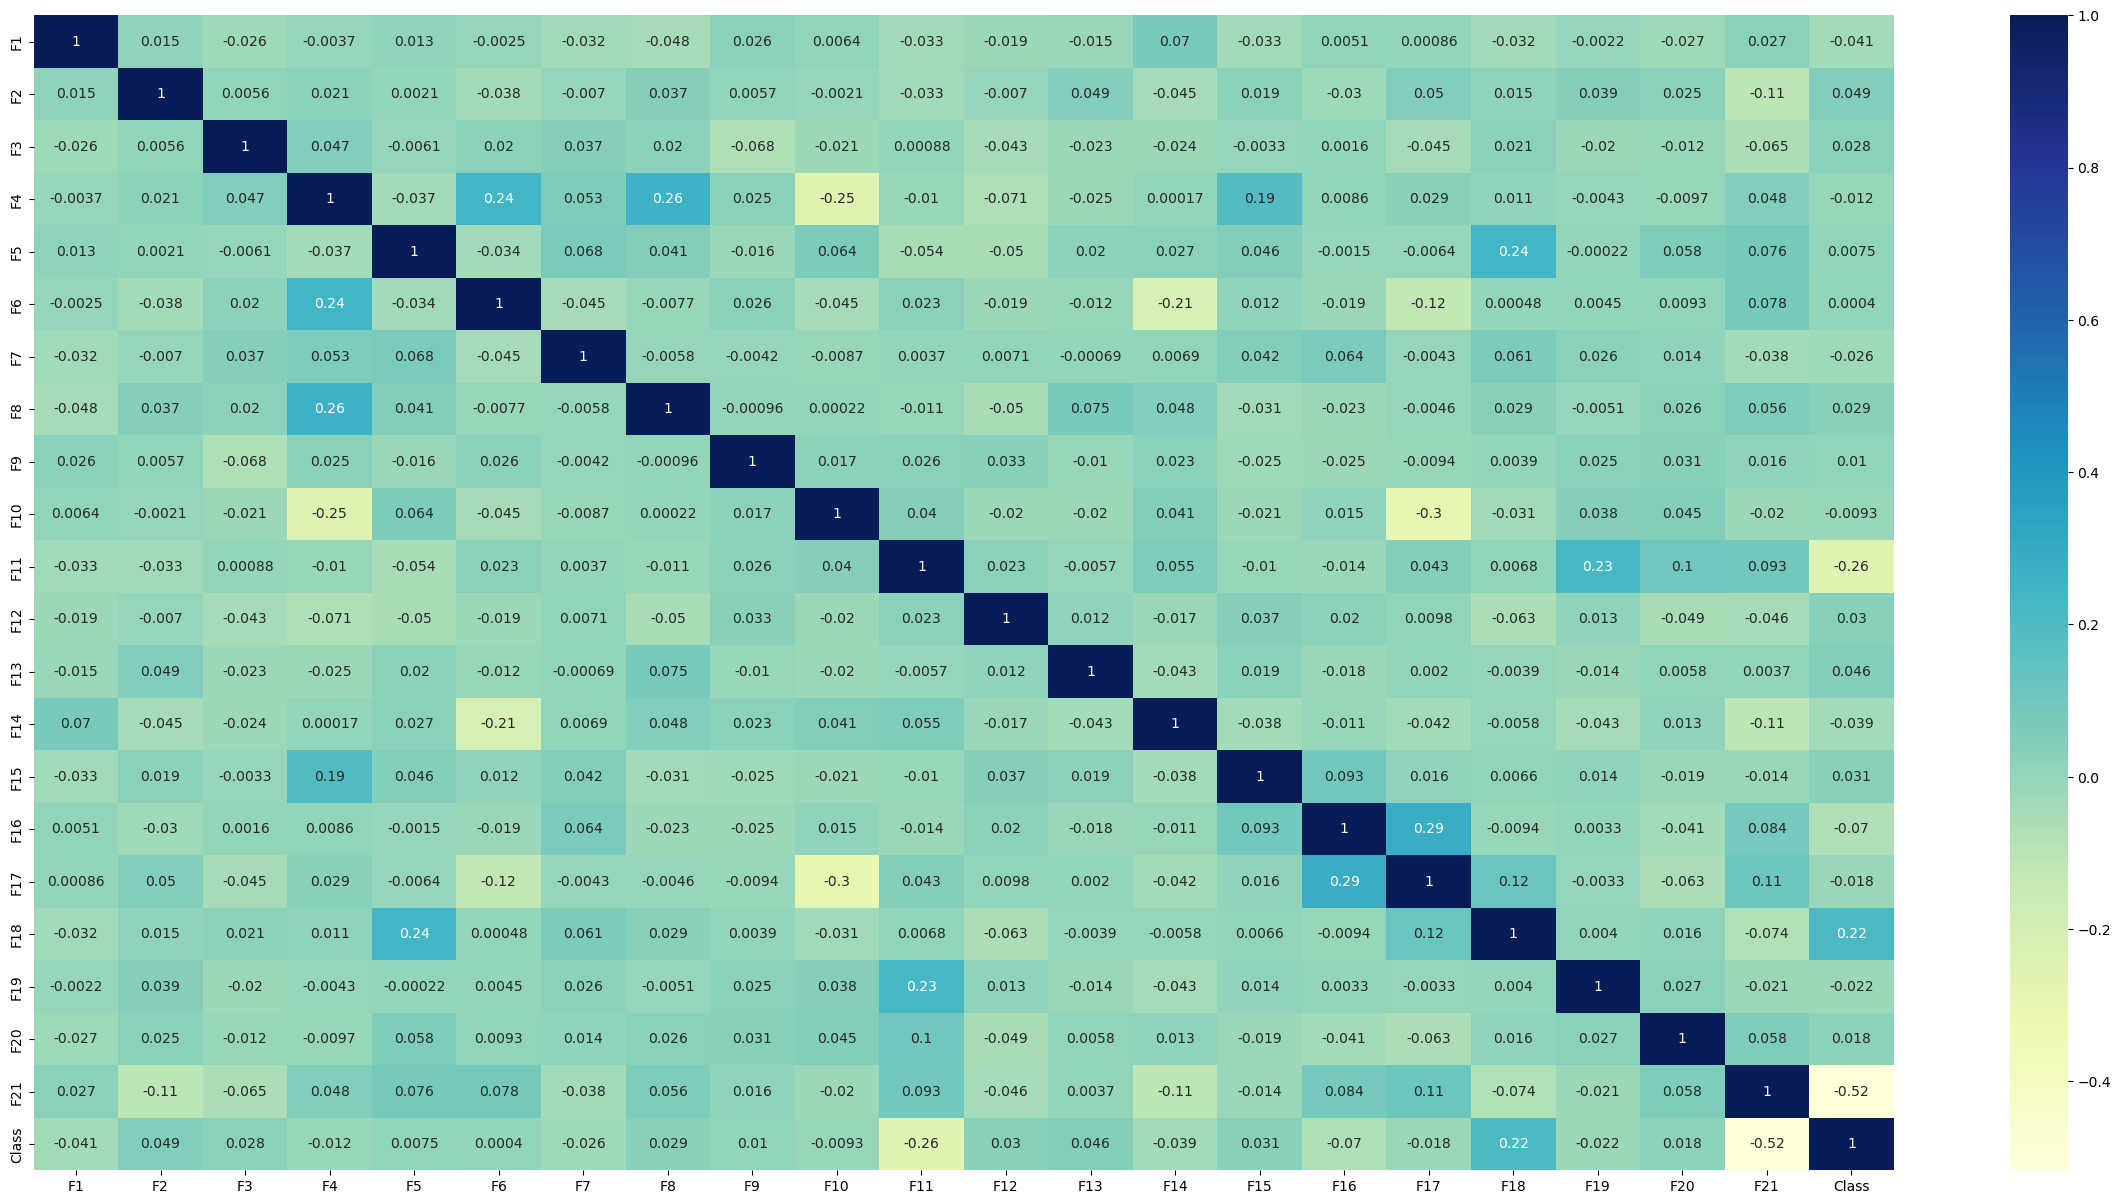

In [6]:
mp.figure(figsize=(30,15))
crln=train_data.corr()
sns.heatmap(crln,xticklabels=crln.columns,yticklabels=crln.columns,annot=True, cmap="YlGnBu")

#### Null Value Check

In [7]:
train_data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

#### Checking data distribution in all features and target

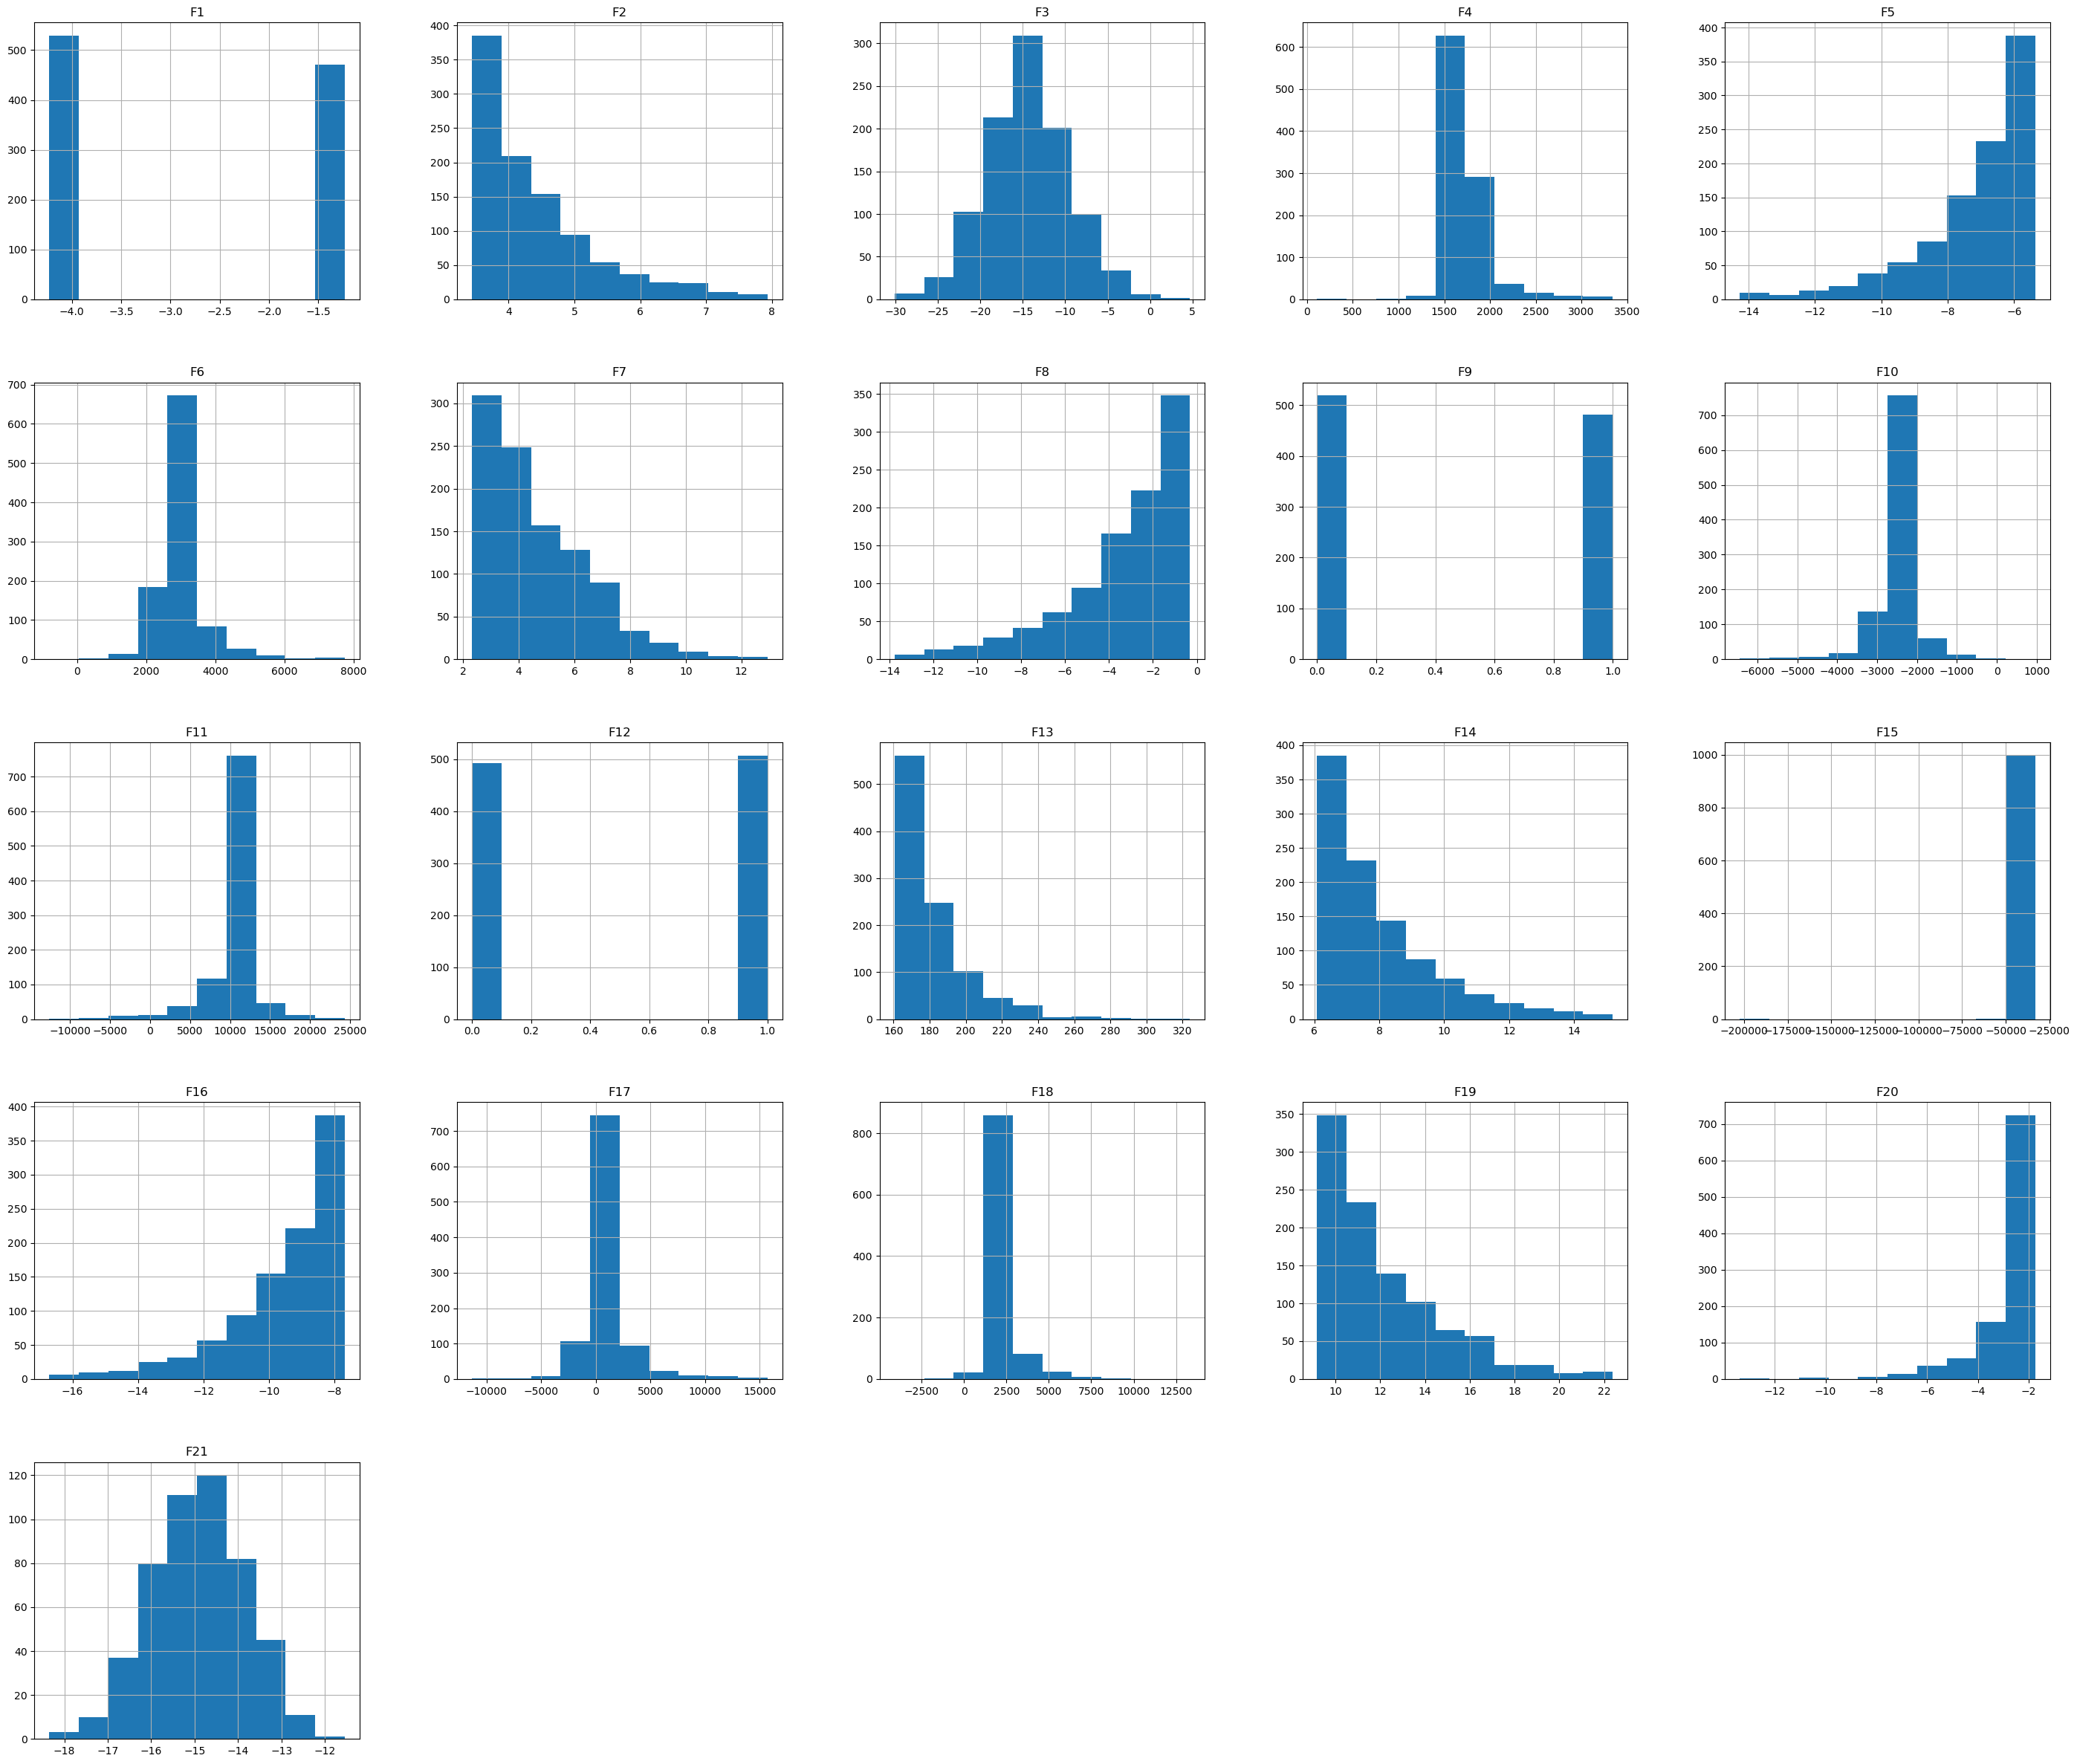

In [8]:
train_data.hist(figsize=(35,30))
mp.show()

#### Function for removing outliers

In [9]:
def remove_outliers(p2_train_df):
    for feature in p2_train_df.columns:
        frt_quartile =np.quantile(p2_train_df[feature], 0.25)
        trd_quartile = np.quantile(p2_train_df[feature], 0.75)
        int_quartile = trd_quartile - frt_quartile
        upper=trd_quartile+(1.5*int_quartile)
        lower=frt_quartile-(1.5*int_quartile)
        p2_train_df.loc[p2_train_df[feature] < lower, feature] = lower # Outliers in lower boundaries replaced with lower 
        p2_train_df.loc[p2_train_df[feature] > upper, feature] = upper # Outliers in upper boundaries replaced with upper

#### Defining parameters of models

In [10]:
model_parameters =  {
    'xgboost': {
        'model': XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',nthread=1),
        'params' : {
            'min_child_weight': [1],
            'gamma': [1, 2],
            'subsample': [0.8, 1],
            'colsample_bytree': [0.8, 1],
            'max_depth': [5, 6]
        }  
    },
    'Decision_Tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
        }
    },
    'Extra_Tree' : {
        'model': ExtraTreesClassifier(verbose=1,
                              random_state=42,
                              n_jobs=5),
        'params': {
            'n_estimators': [10, 20, 50, 100, 200, 500, 1000, 1200, 1500, 1800, 1900, 2000, 2100, 3000]
            
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
             'C':[0.1,1,100,1000],'kernel':['rbf','linear'],'degree':[1,2,3],'gamma': [0.1, 0.01, 0.001,]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'penalty': ['l2'],
        'C': [1.0, 0.1, 0.01]     
        }                          
    }
}

#### Function for performing Gridsearch and evaluation matrices of each model

In [11]:
def grid_search(x_train,y_train,x_val,y_val, columns,title):
    scores = []
    acc_scores = []
    #x_train_pow = scaling_using_power_transformer(x_train)
    #x_val_pow = scaling_using_power_transformer(x_val)
    x_train = min_max_scalar(x_train, columns)
    x_val = min_max_scalar(x_val, columns )
    
    for modelname, mp in model_parameters.items():
        model =  GridSearchCV(mp['model'], mp['params'], cv=10, verbose=1) # Gridsearch 
        model.fit(x_train,y_train)
        predict = model.best_estimator_.predict(x_val)  # Best estimator after Gridsearch
        
        accuracyscore = accuracy_score(y_val, predict)  # Finding accuracy score of model
        acc_scores.append(accuracyscore)     # Appending accuracy score to list
        
        x_merge = pd.DataFrame(x_train).append(pd.DataFrame(x_val)) # Merging training and validation set to perform cross validation
        y_merge = pd.DataFrame(y_train).append(pd.DataFrame(y_val))
        y_merge.columns = ["Target"]
        x_merge.columns = columns
        cv_results = (cross_val_score(model.best_estimator_,x_merge,y_merge,cv=10)) # Cross validation
        
        #auc_score = roc_auc_score(y_train, model.decision_function(x_val))
        
        # Appending all obtained scores to scores list
        scores.append({
            'model': modelname,
            'best_params': model.best_params_,
            'best_scores': model.best_score_,
            'model_score' : model.best_estimator_.score(x_train,y_train),
            'cross_validation' : cv_results.mean(),
            'accuracy_score' : accuracyscore,
            'best_classifier' : model.best_estimator_
            })
    pd.set_option('display.max_colwidth', 0)
    score_df = pd.DataFrame(scores,columns=['model','model_score','cross_validation','accuracy_score','best_scores','best_params'])
    return score_df

#### Function for checking best imputation technique for filling null values in feature 'F21' 

In [12]:
def imputation(imputation_method, df):
    columns = [["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20","F21"]]
    for imp in imputation_method:
        
        # Filling null values of feature 'F21' with median
        
        if imp == 'median':
            df['F21'] = df['F21'].fillna(df['F21'].median())
            y_train_m = df.iloc[:,-1:]
            X_train_m = df.drop(df.columns[-1:],axis=1)
            remove_outliers(X_train_m)
            X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_train_m, y_train_m, test_size=0.25, random_state=0)
            df_median = grid_search(X_train_m,y_train_m, X_val_m,y_val_m, columns,imp) 
            print(df_median)
            
        # Filling null values of feature 'F21' with mean
        
        if imp == 'mean':    
            df['F21'] = df['F21'].fillna(df['F21'].mean())
            y_train_m = df.iloc[:,-1:]
            X_train_m = df.drop(df.columns[-1:],axis=1)
            remove_outliers(X_train_m)
            X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_train_m, y_train_m, test_size=0.25, random_state=0)
            df_mean = grid_search(X_train_m,y_train_m, X_val_m,y_val_m, columns,imp) 
            print(df_mean)
            
        # Filling null values of feature 'F21' with mode
        
        if imp == 'mode': 
            df['F21'] = df['F21'].fillna(df['F21'].mode())
            y_train_m = df.iloc[:,-1:]
            X_train_m = df.drop(df.columns[-1:],axis=1)
            remove_outliers(X_train_m)
            X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_train_m, y_train_m, test_size=0.25, random_state=0)
            df_mode = grid_search(X_train_m,y_train_m, X_val_m,y_val_m, columns,imp) 
            print(df_mode)
            
        # By dropping the feature 'F21'
        
        if imp == 'none':   
            df = df.drop("F21", axis='columns')
            column_drop = [["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20"]]
            y_train_m = df.iloc[:,-1:]
            X_train_m = df.drop(df.columns[-1:],axis=1)
            remove_outliers(X_train_m)
            X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_train_m, y_train_m, test_size=0.25, random_state=0)
            score_df_without_f21 = grid_search(X_train_m,y_train_m, X_val_m,y_val_m, column_drop, imp) 
            print(score_df_without_f21)
    return df_median, df_mean, df_mode, score_df_without_f21

#### Normalising the features using minmax scalar

In [13]:
def min_max_scalar(X_train, columns):
    x = X_train.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    X_train = pd.DataFrame(x_scaled)
    X_train.columns = columns
    return X_train

#### Function for ploting bar graph Accuracy score obtained from each model

In [14]:
def plot_imputation_bar_graph(acc_scores,title):
    fig = mp.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_axes([0,0,1,1])
    xlocs, xlabs = mp.xticks()
    xlocs=[i for i in range(0,10)]
    for i, v in enumerate(acc_scores):
        mp.text(xlocs[i] - 0.25, v + 0.01, str(v))
    models = ['XGBoost', 'Decision Tree', 'Extra Tree', 'SVM', 'Logistic Regression']
    accuracy_scores = acc_scores
    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy Score')
    ax.bar(models,accuracy_scores)
    mp.show()

#### Splitting data into training and validation set

In [15]:
X_train = train_data.drop(train_data.columns[-1:],axis=1)
y_train = train_data.iloc[:,-1:]

#### Multipying with 1 to make bool to numerical value to plot pie chart

In [16]:
y_train_pie = y_train * 1
y_train_pie.nunique()

Class    2
dtype: int64

#### Ploting pie chart for Target column

Numbers of records affected people:  506
Numbers of records not affected  494


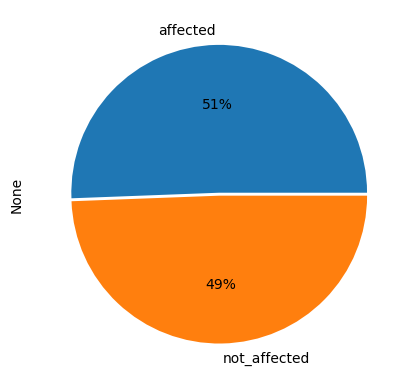

In [17]:
affected = len(y_train_pie[y_train_pie["Class"] == 1])
not_affected = len(y_train_pie[y_train_pie["Class"] == 0])
print("Numbers of records affected people: ", affected)
print("Numbers of records not affected ", not_affected)
labels = ["affected", "not_affected"]
mycolors = ["hotpink","#4CAF50"]
y_train_pie.value_counts().plot.pie(explode = [.01, .01], autopct = '%1.0f%%', labels = labels)
mp.show()
mp.close()

#### Calling imputation method to check which imputation method give best score

In [18]:
imputation_methods = ['median', 'mean', 'mode','none']
imp_df = imputation(imputation_methods, train_data)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    6.7s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  1

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
                 model  model_score  cross_validation  accuracy_score  \
0  xgboost              0.988000     0.904             0.904            
1  Decision_Tree        0.961333     0.855             0.812            
2  Extra_Tree           1.000000     0.826             0.808            
3  SVM                  0.966667     0.826             0.792            
4  Logistic_Regression  0.764000     0.724             0.712            

   best_scores  \
0  0.893333      
1  0.849333      
2  0.818667      
3  0.801333      
4  0.746667      

                                                                                    best_params  
0  {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1}  
1  {'criterion': 'gini', 'max_depth': 6}                                                         
2  {'n_estimators': 100}          

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    6.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  1

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
                 model  model_score  cross_validation  accuracy_score  \
0  xgboost              0.988000     0.904             0.904            
1  Decision_Tree        0.926667     0.862             0.824            
2  Extra_Tree           1.000000     0.826             0.808            
3  SVM                  0.966667     0.826             0.792            
4  Logistic_Regression  0.764000     0.724             0.712            

   best_scores  \
0  0.893333      
1  0.850667      
2  0.818667      
3  0.801333      
4  0.746667      

                                                                                    best_params  
0  {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1}  
1  {'criterion': 'entropy', 'max_depth': 6}                                                      
2  {'n_estimators': 100}          

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    6.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  1

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
                 model  model_score  cross_validation  accuracy_score  \
0  xgboost              0.988000     0.904             0.904            
1  Decision_Tree        0.926667     0.861             0.832            
2  Extra_Tree           1.000000     0.826             0.808            
3  SVM                  0.966667     0.826             0.792            
4  Logistic_Regression  0.764000     0.724             0.712            

   best_scores  \
0  0.893333      
1  0.850667      
2  0.818667      
3  0.801333      
4  0.746667      

                                                                                    best_params  
0  {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1}  
1  {'criterion': 'entropy', 'max_depth': 6}                                                      
2  {'n_estimators': 100}          

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    6.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  1

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
                 model  model_score  cross_validation  accuracy_score  \
0  xgboost              0.985333     0.904             0.900            
1  Decision_Tree        0.926667     0.856             0.828            
2  Extra_Tree           1.000000     0.839             0.816            
3  SVM                  0.962667     0.808             0.804            
4  Logistic_Regression  0.730667     0.692             0.676            

   best_scores  \
0  0.889333      
1  0.853333      
2  0.822667      
3  0.784000      
4  0.712000      

                                                                                  best_params  
0  {'colsample_bytree': 1, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1}  
1  {'criterion': 'entropy', 'max_depth': 6}                                                    
2  {'n_estimators': 200}                

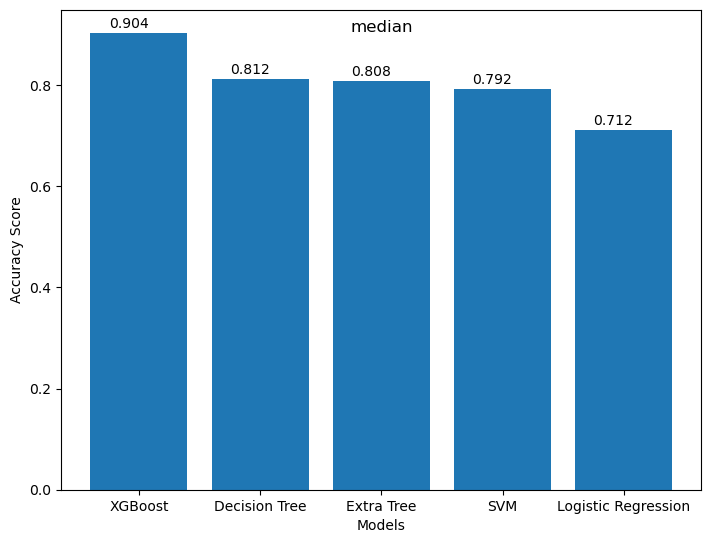

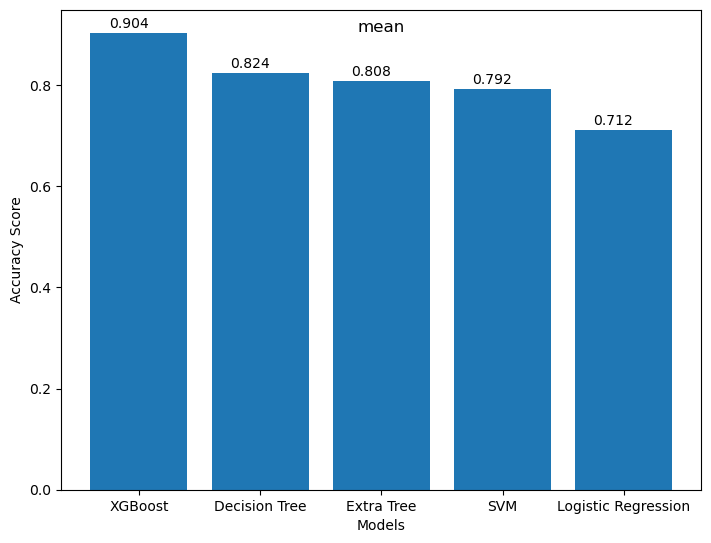

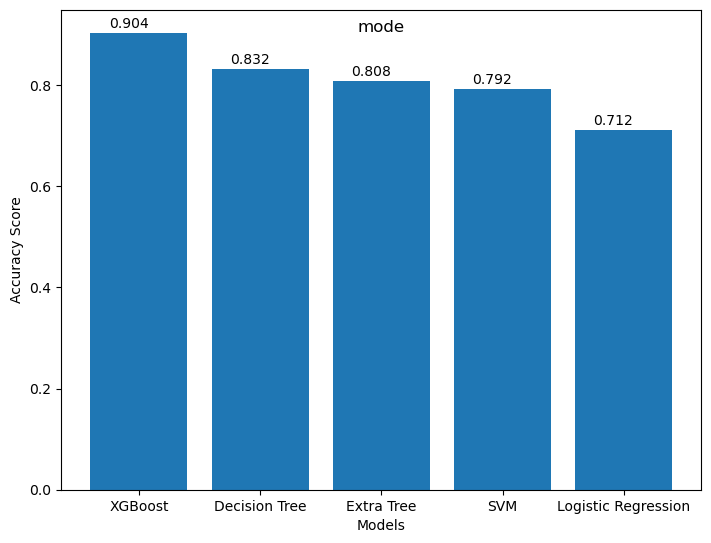

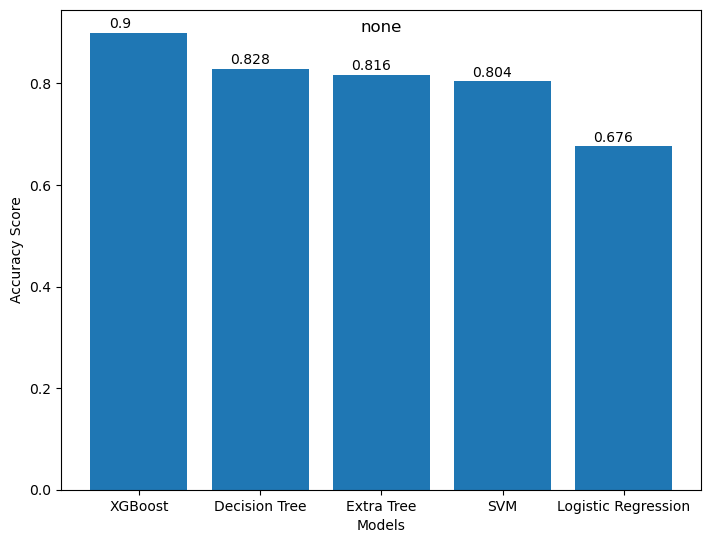

In [19]:
for i in range(0,4):
    plot_imputation_bar_graph(imp_df[i].accuracy_score, imputation_methods[i])

In [20]:
tuned_parameter = pd.DataFrame(imp_df[0].drop(columns=['model_score', 'cross_validation', 'accuracy_score']))

In [21]:
tuned_parameter

,model,best_scores,best_params
0,xgboost,0.893333,"{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1}"
1,Decision_Tree,0.849333,"{'criterion': 'gini', 'max_depth': 6}"
2,Extra_Tree,0.818667,{'n_estimators': 100}
3,SVM,0.801333,"{'C': 100, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}"
4,Logistic_Regression,0.746667,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}"


In [22]:
scores = pd.DataFrame(imp_df[0].drop(columns=['best_scores', 'best_params']))
scores

,model,model_score,cross_validation,accuracy_score
0,xgboost,0.988000,0.904,0.904
1,Decision_Tree,0.961333,0.855,0.812
2,Extra_Tree,1.000000,0.826,0.808
3,SVM,0.966667,0.826,0.792
4,Logistic_Regression,0.764000,0.724,0.712


Training the trainig set and validation set by replacing median with null values in F21 column and training the dataset using XG Boost classifier as this gave the best accuracy score.

In [23]:
X_train['F21'] = X_train['F21'].fillna(X_train['F21'].median())

#### Outliers in the dataset

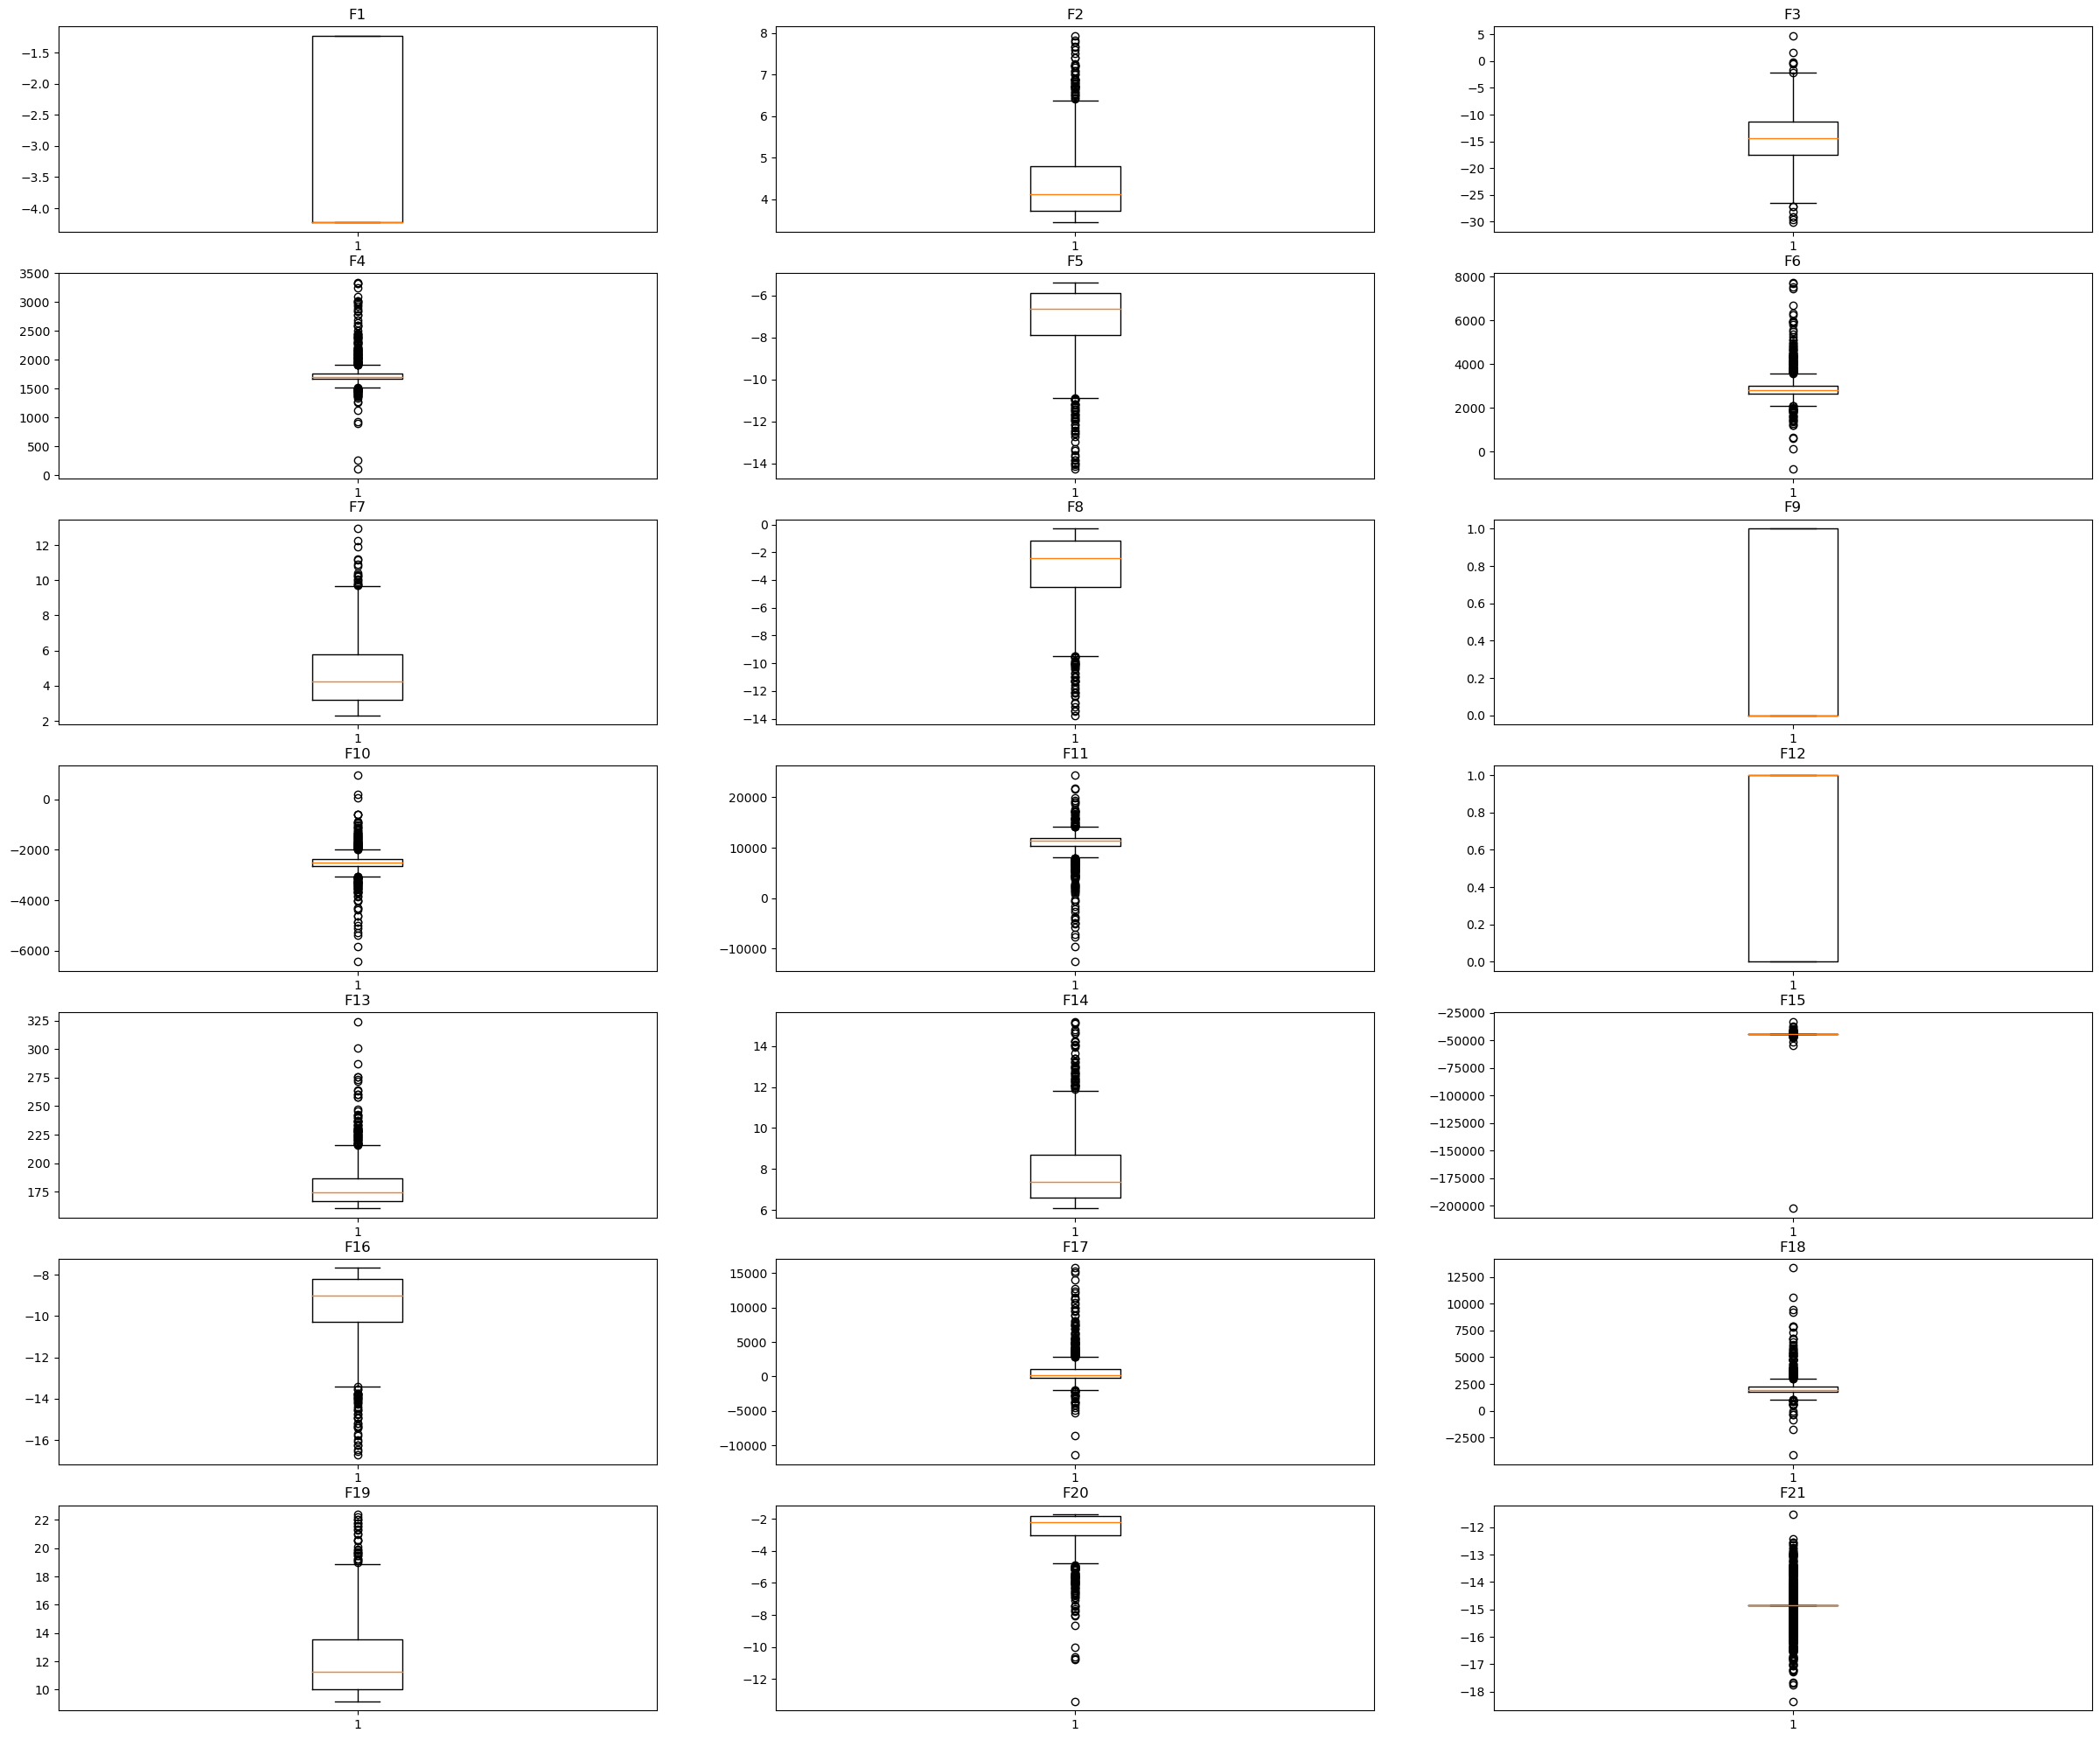

In [24]:
fig, ax = mp.subplots(figsize=(30,25),nrows=7, ncols=3)
i = j = 0
n = 22
col = 3
for k in range(1, n):
    v = 'F' + str(k)
    ax[i,j].boxplot(X_train[v]) 
    ax[i,j].set_title(v)
    j += 1
    if j == col:
        i += 1
        j = 0        
mp.show()

#### Removing Outliers

In [25]:
remove_outliers(X_train) 

#### After Removing outliers

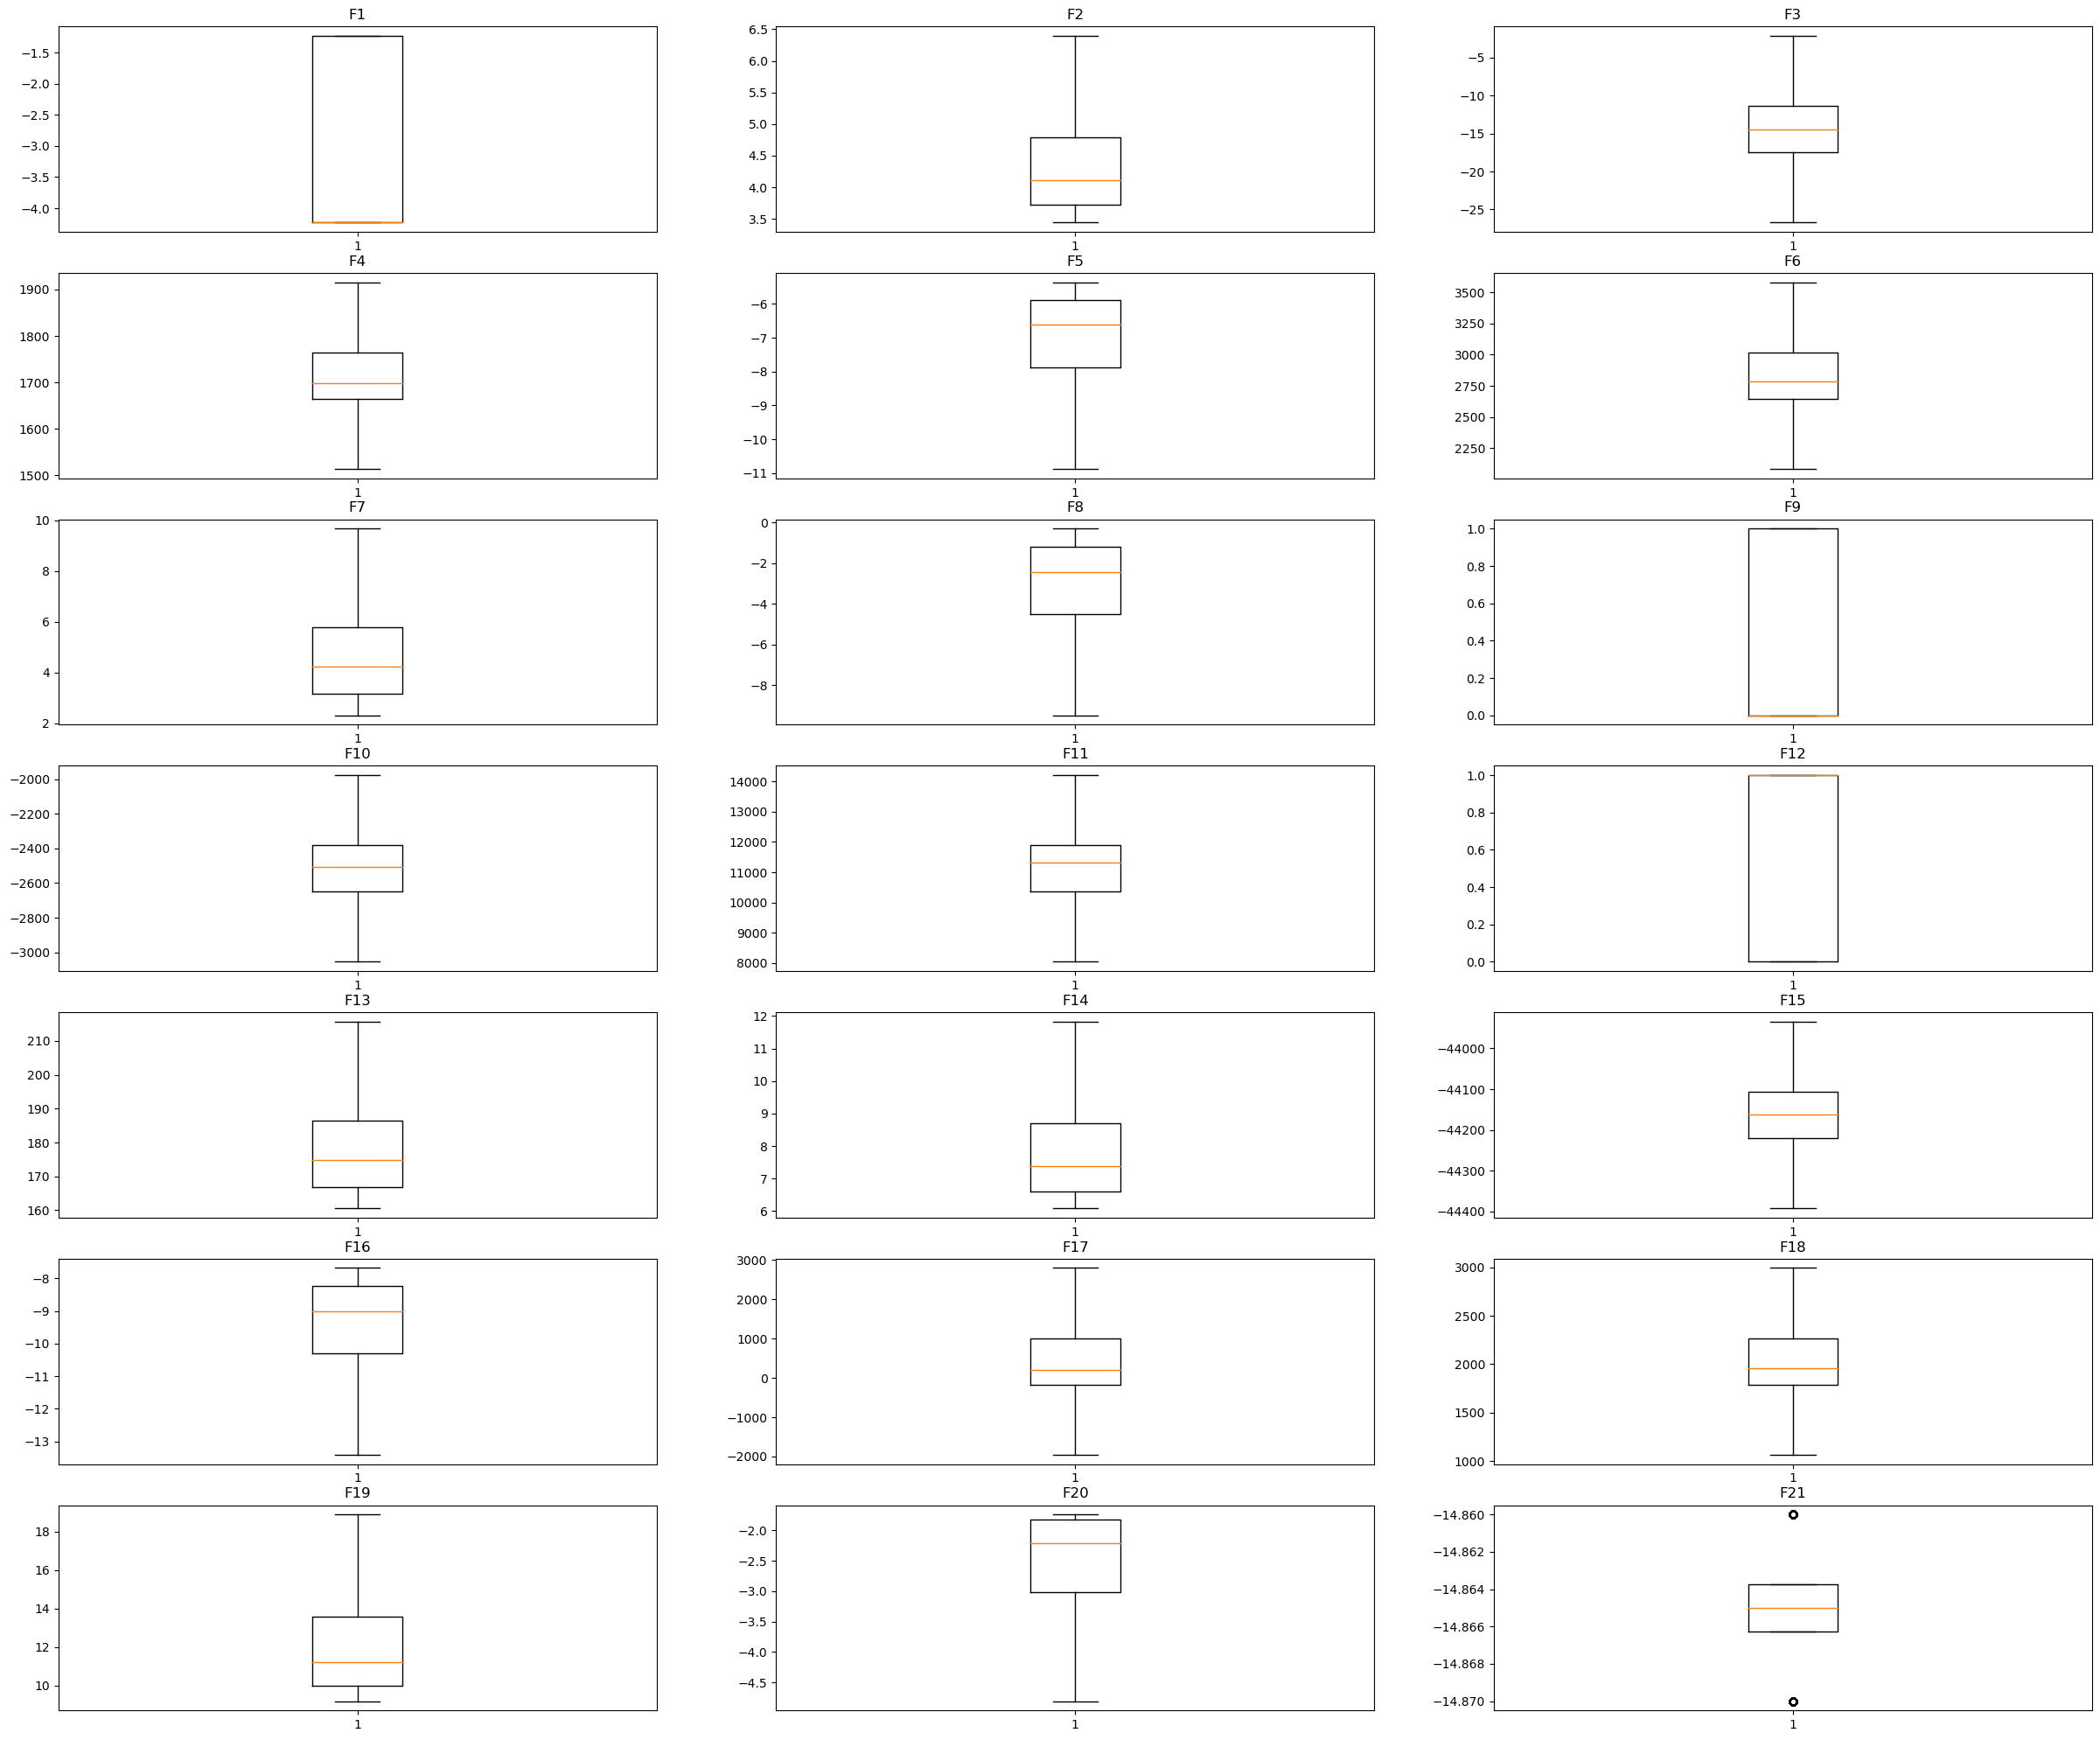

In [26]:


fig, ax = mp.subplots(figsize=(30,25),nrows=7, ncols=3)
i = j = 0
n = 22
col = 3
for k in range(1, n):
    v = 'F' + str(k)
    ax[i,j].boxplot(X_train[v]) 
    ax[i,j].set_title(v)
    j += 1
    if j == col:
        i += 1
        j = 0        
mp.show()

#### Normalisation using minmax scalar

In [27]:
columns = ["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20","F21"]
X_train_scaled = min_max_scalar(X_train, columns)

#### Splitting training dataset in to training set and validation set

In [28]:
Xtrain, Xval, ytrain, yval = train_test_split(X_train_scaled, y_train, test_size=0.25, random_state=0)

### Decision Tree - Training the model using traing set

In [29]:
dc_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dc_model.fit(Xtrain, ytrain)
cv = cross_val_score(dc_model, Xtrain, ytrain, cv=10)
print("Cross Validation Score",cv)
print("Average Cross Validation Score",cv.mean())
dc_ypred = dc_model.predict(Xval)
print("Accuracy Score : ",accuracy_score(yval, dc_ypred))

Cross Validation Score [0.89333333 0.77333333 0.8        0.72       0.84       0.90666667
 0.85333333 0.85333333 0.85333333 0.96      ]
Average Cross Validation Score 0.8453333333333333
Accuracy Score :  0.848


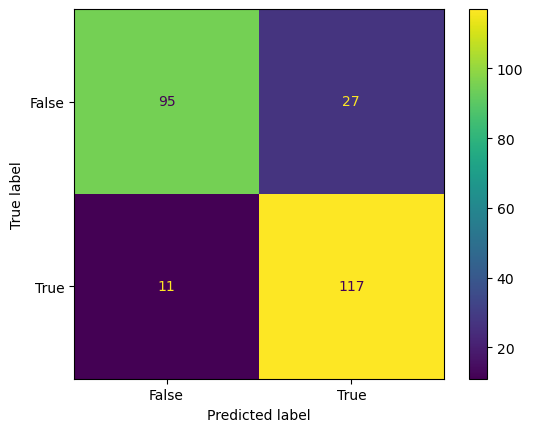

In [34]:
m = confusion_matrix(yval, dc_ypred, labels=dc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=m,
                            display_labels=dc_model.classes_)
disp.plot()
mp.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(yval, dc_ypred))

              precision    recall  f1-score   support

       False       0.90      0.78      0.83       122
        True       0.81      0.91      0.86       128

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



### Extra Tree - Training the model using traing set

In [37]:
ex_model = ExtraTreesClassifier(verbose=1,random_state=42,n_estimators = 100,n_jobs=5)
ex_model.fit(Xtrain, ytrain)
cv = cross_val_score(ex_model, Xtrain, ytrain, cv=10)
print("Cross Validation Score",cv)
print("Average Cross Validation Score",cv.mean())
ex_ypred = ex_model.predict(Xval)
print("Accuracy Score : ",accuracy_score(yval, ex_ypred))

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    6.2s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    6.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Don

Cross Validation Score [0.86666667 0.86666667 0.8        0.81333333 0.77333333 0.78666667
 0.8        0.77333333 0.85333333 0.85333333]
Average Cross Validation Score 0.8186666666666668
Accuracy Score :  0.812


[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


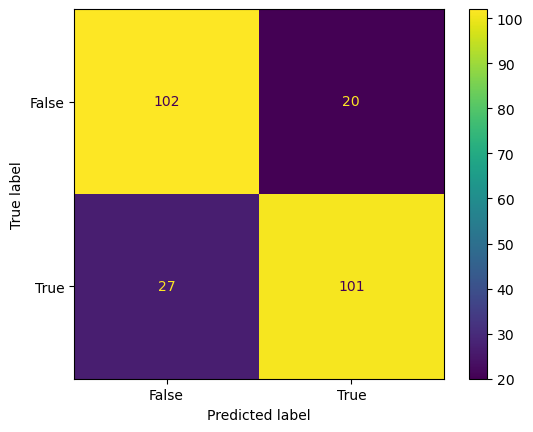

In [38]:
m = confusion_matrix(yval, ex_ypred, labels=ex_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=m,
                            display_labels=ex_model.classes_)
disp.plot()
mp.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(yval, ex_ypred))

              precision    recall  f1-score   support

       False       0.79      0.84      0.81       122
        True       0.83      0.79      0.81       128

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



###  XG Boost Training the model using traing set

In [40]:
model = XGBClassifier(colsample_bytree = 0.8, gamma= 2, max_depth= 6, min_child_weight= 1, subsample = 1,learning_rate=0.02, n_estimators=600, objective='binary:logistic',nthread=1) 
model.fit(Xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', ...)

#### Cross Validation

In [41]:
cv = cross_val_score(model, Xtrain, ytrain, cv=10)
print("Cross Validation Score",cv)
print("Average Cross Validation Score",cv.mean())

Cross Validation Score [0.93333333 0.86666667 0.89333333 0.90666667 0.88       0.86666667
 0.90666667 0.85333333 0.90666667 0.92      ]
Average Cross Validation Score 0.8933333333333333


#### Prediction using validation set

In [42]:
ypred = model.predict(Xval)

#### Accuracy Score

In [43]:
print("Accuracy Score : ",accuracy_score(yval, ypred))

Accuracy Score :  0.904


#### Confusion Matrix

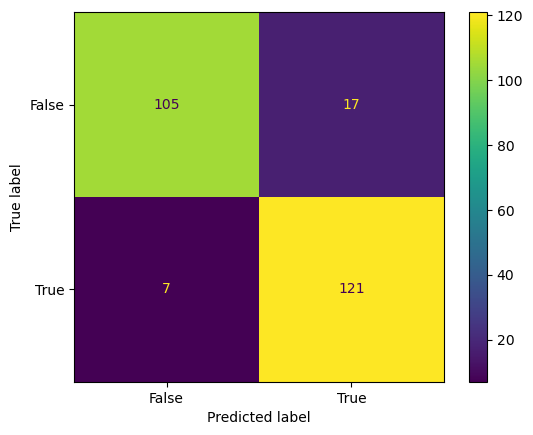

In [44]:
m = confusion_matrix(yval, ypred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=m,
                            display_labels=model.classes_)
disp.plot()
mp.show()

#### Classification Report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(yval, ypred))

              precision    recall  f1-score   support

       False       0.94      0.86      0.90       122
        True       0.88      0.95      0.91       128

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250



### Part B

In [47]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('/Users/gayathri/Downloads/CE802_P2_Data/CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

#Filling null Values with Median
test_data['F21'] = test_data['F21'].fillna(test_data['F21'].median())

remove_outliers(test_data) # Removing Outliers

columns = ["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20","F21"]

# Normalizing the data
test_data_scaled = min_max_scalar(test_data, columns)

#Prediction
predicted = model.predict(test_data_scaled)

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted.astype(bool) 

# Save to the destination file
test_df.to_csv('/Users/gayathri/Downloads/CE802_P2_Data/CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('/Users/gayathri/Downloads/CE802_P2_Data/CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])